<a href="https://colab.research.google.com/github/claudiaesnarrizaga/UFV-visualizacion/blob/main/EJERCICIOS%20CLASE/Pr%C3%A1ctica_de_Python_(ventas_en_Europa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO VENTAS**

**NOMBRE:** Claudia Esnarrizaga Rodríguez

**FECHA:** 18/10/2024

**GRADO:** 4ºB Ingeniería Matemática

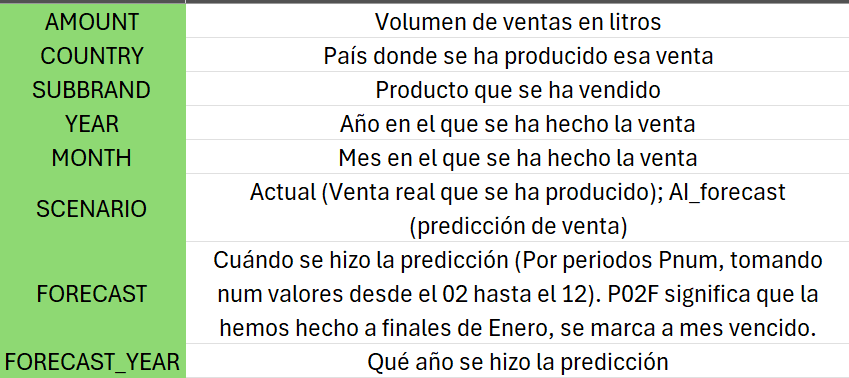

Antes de nada, miremos qué variables tiene nuestra base de datos y qué significan.

Veamos dos ejemplos para que nos quede más claro, siendo el orden de las columnas:

* COUNTRY
* SUBBRAND
* YEAR
* MONTH
* SCENARIO
* FORECAST
* FORECAST_YEAR
* AMOUNT

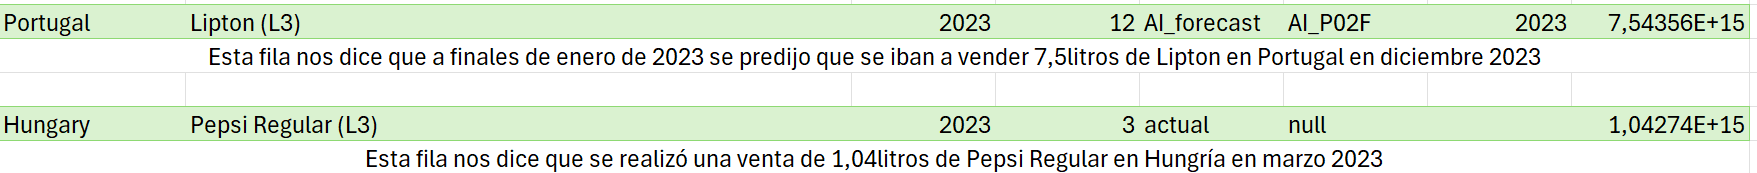

# **Pre tratado de la base de datos**

## Carga del archivo y las librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Enlace al archivo CSV en la versión "raw" de GitHub
url = 'https://raw.githubusercontent.com/claudiaesnarrizaga/UFV-visualizacion/refs/heads/main/EJERCICIOS%20CLASE/datos_ejercicio_ventas.csv?token=GHSAT0AAAAAAC2CQIOZ4DNTML7ROZBKSZ2CZZLXSYA'

# Leer el archivo CSV ignorando las columnas adicionales generadas por los delimitadores
ventas = pd.read_csv(url, sep=',', usecols=lambda column: column not in ['', None])

# Mostrar las primeras 5 filas del DataFrame
ventas.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


## 1. Tamaño del dataset

In [ ]:
print("Tamaño del dataset:", ventas.shape)

Tamaño del dataset: (18666, 8)


El dataset tiene 18666 filas y 8 columnas.

## 2. Nº actuals y forecasts

Para contar el número de actuals y de forecasts voy a utilizar el comando `.shape[0]`, que me da el número de filas según la condición que metamos. Para obtener actuals y forecasts por separado, filtramos la columna 'SCENARIO', que es la que contiene si es uno u otro, y le aplicamos el comando previamente descrito.



In [ ]:
# Contamos el número de forecasts y actuals en la columna SCENARIO
num_forecasts = ventas[ventas['SCENARIO'] == 'AI_forecast'].shape[0]
num_actuals = ventas[ventas['SCENARIO'] == 'actual'].shape[0]

# Mostramps resultados
print("Número de forecasts:", num_forecasts)
print("Número de actuals:", num_actuals)

Número de forecasts: 17766
Número de actuals: 900


## 3. Horizonte de predicción

El horizonte de predicción se refiere a la cantidad de periodos futuros para los que se realizan pronósticos.

En nuestro caso, el horizonte de predicción es el número de puntos en el tiempo que estamos proyectando. En nuestra base de datos este campo está en meses, lo que quiere decir que lo que nos devuelva el código será el pronóstico en meses.

In [ ]:
lipton = ventas[ventas['SUBBRAND'] == 'Lipton (L3)']
lipton_portugal = lipton[lipton['COUNTRY'] == 'Portugal']
lipton_portugal_predicciones = lipton_portugal[lipton_portugal['SCENARIO'] == 'AI_forecast']
lipton_portugal_predicciones_p11f = lipton_portugal_predicciones[lipton_portugal_predicciones['FORECAST'] == 'AI_P11F']
lipton_portugal_predicciones_p11f.count()

,0
COUNTRY,18
SUBBRAND,18
YEAR,18
MONTH,18
SCENARIO,18
FORECAST,18
FORECAST_YEAR,18
AMOUNT,18


In [ ]:
pepsi_regular = ventas[ventas['SUBBRAND'] == 'Pepsi Regular (L3)']
pepsi_regular_spain = pepsi_regular[pepsi_regular['COUNTRY'] == 'Spain']
pepsi_regular_spain_ai_forecast = pepsi_regular_spain[pepsi_regular_spain['SCENARIO'] == 'AI_forecast']
pepsi_regular_spain_ai_forecast_P11F = pepsi_regular_spain_ai_forecast[pepsi_regular_spain_ai_forecast['FORECAST'] == 'AI_P11F']
pepsi_regular_spain_ai_forecast_P11F.count()

,0
COUNTRY,54
SUBBRAND,54
YEAR,54
MONTH,54
SCENARIO,54
FORECAST,54
FORECAST_YEAR,54
AMOUNT,54


Nuestro output para Pepsi Regular en España es de 54, es decir, tenemos 54 meses de predicciones. Dicho de otra manera, las proyecciones de ventas se hacen durante 54 meses futuros.

Probemos con otro producto en otro país.

In [ ]:
sup = ventas[ventas['SUBBRAND'] == '7up (L3)']
sup_gb = sup[sup['COUNTRY'] == 'Great Britain']
sup_gb_ai_forecast = sup_gb[sup_gb['SCENARIO'] == 'AI_forecast']
sup_gb_ai_forecast_P11F = sup_gb_ai_forecast[sup_gb_ai_forecast['FORECAST'] == 'AI_P12F']
sup_gb_ai_forecast_P11F.count()

,0
COUNTRY,72
SUBBRAND,72
YEAR,72
MONTH,72
SCENARIO,72
FORECAST,72
FORECAST_YEAR,72
AMOUNT,72


En este caso, nos sale que el horizonte de predicción abarca 72 meses, es decir, las proyecciones de ventas para este caso llega a 6 años.

## 4. Número de países y de productos

Para contar el número de países y de productos, se puede utilizar `nunique()`, que te cuenta los valores que toma la columna que pongas. También se puede hacer un `unique()` y luego hacer `len()` de ese array (`unique()` te devuelve vector). Sin embargo, si hay nans te lo cuenta también, por eso he elegido utilizar `nunique()`.

In [ ]:
# Contamos el número de países únicos
# paises = df['COUNTRY'].unique()
# len(paises)
num_paises = ventas['COUNTRY'].nunique()

# Contamos el número de productos (submarcas) únicos
# productos = df['SUBBRAND'].unique()
# len(productos)
num_productos = ventas['SUBBRAND'].nunique()

# Mostramos resultados
print("Número de países:", num_paises)
print("Número de productos (submarcas):", num_productos)

Número de países: 9
Número de productos (submarcas): 6


## 5. Histórico de actuals / forecasts

El histórico se refiere a los datos disponibles que abarcan un periodo específico en el pasado, tanto para valores reales (actuals) como para predicciones (forecasts).

En nuestro caso, he ordenado los datos por año y mes para analizar el rango temporal de los valores históricos tanto de los datos reales como de las predicciones.

In [ ]:
# Filtramos por los valores 'Actual' en la columna SCENARIO
actuals = ventas[ventas['SCENARIO'] == 'actual']
actuals_ordenado = actuals.sort_values(by=['YEAR', 'MONTH']).reset_index(drop=True)
actuals_ordenado

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Spain,Pepsi Max (L3),2023,1,actual,NaN,NaN,8.327406e+04
1,Hungary,7up (L3),2023,1,actual,NaN,NaN,6.464034e+04
2,Netherlands,Pepsi Max (L3),2023,1,actual,NaN,NaN,6.868530e+05
3,Norway,Pepsi Max (L3),2023,1,actual,NaN,NaN,2.521704e+06
4,Portugal,7up Free (L3),2023,1,actual,NaN,NaN,7.207855e+04
...,...,...,...,...,...,...,...,...
895,Great Britain,7up (L3),2024,8,actual,NaN,NaN,3.874281e+05
896,Norway,Mountain Dew (L3),2024,8,actual,NaN,NaN,9.112875e+03
897,Czech,Pepsi Regular (L3),2024,8,actual,NaN,NaN,9.852902e+05
898,Norway,Lipton (L3),2024,8,actual,NaN,NaN,-2.435665e+03


**Histórico de actuals**

He filtrado los datos actuals y los he ordenado por año y mes. Esto me permite ver que el rango de datos históricos va desde enero de 2023 hasta agosto de 2024.

In [ ]:
# Filtrar por los valores 'AI_Forecast' en la columna SCENARIO
ai = ventas[ventas['SCENARIO'] == 'AI_forecast']
ai_ordenado = ai.sort_values(by=['YEAR', 'MONTH']).reset_index(drop=True)
ai_ordenado

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Czech,Pepsi Max (L3),2023,1,AI_forecast,AI_PF,2023.0,3.174244e+05
1,Hungary,Pepsi Max (L3),2023,1,AI_forecast,AI_PF,2023.0,5.050095e+05
2,Portugal,Pepsi Regular (L3),2023,1,AI_forecast,AI_PF,2023.0,1.692465e+05
3,Great Britain,7up Free (L3),2023,1,AI_forecast,AI_PF,2023.0,1.207824e+06
4,Norway,7up (L3),2023,1,AI_forecast,AI_PF,2023.0,6.636102e+03
...,...,...,...,...,...,...,...,...
17761,Spain,Pepsi Max (L3),2025,5,AI_forecast,AI_P12F,2023.0,1.467099e+05
17762,Great Britain,7up Free (L3),2025,5,AI_forecast,AI_P12F,2023.0,1.682929e+06
17763,Great Britain,7up Free (L3),2025,5,AI_forecast,AI_P12F,2023.0,3.589453e+05
17764,Norway,Pepsi Regular (L3),2025,5,AI_forecast,AI_P12F,2023.0,3.059299e+04


**Histórico de AI_forecast**

Hago lo mismo para las predicciones y observamos que el rango va desde enero de 2023 hasta mayo de 2025.

Aplicando lo visto previamente, tendríamos un horizonte de predicción de aproximadamente 29 meses.

## 6. Forecasts distintos

Como nuestra columna de 'FORECAST_YEAR' solo tiene datos para 2023, entonces no hace falta ver la combinación.

Si hubiera 'FORECAST_YEAR == 2024' entonces lo que tendríamos que hacer es para cada periodo, cuántos se hacen en 2023 y cuántos en 2024. Para eso filtraríamos por cada periodo y contaríamos cuántos se hacen en 2023 y cuántos en 2024.

In [ ]:
forecasts = ventas['FORECAST'].unique()
forecasts

array(['AI_P02F', 'AI_P10F', 'AI_P09F', 'AI_P03F', 'AI_PF', 'AI_P11F',
       'AI_P06F', 'AI_P05F', 'AI_P07F', 'AI_P12F', 'AI_P08F', 'AI_P04F',
       nan], dtype=object)

In [ ]:
num_pred = ventas['FORECAST'].nunique()
print("Número de actuals:", num_pred)

Número de actuals: 12


# **Preguntas a responder**

## **Distribución de las ventas (predicciones y actuals)**

En esta parte voy a realizar un análisis de las distribuciones de ventas según:

*   País
*   Mes
*   Marca

Las distribuciones en este apartado tienen en cuenta el valor total de las ventas según los puntos descritos previamente y teniendo en cuenta tanto predicciones como actuals.



Para empezar, la columna 'AMOUNT' es de tipo float64, así que a priori parece no ser necesario tratar este campo

In [ ]:
ventas['AMOUNT'].dtype

dtype('float64')

### En cada país (predicciones y actuals)

Calculamos la distribución.

In [ ]:
# Ahora calculamos la suma de AMOUNT por COUNTRY
distribucion_ventas_pais = ventas.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Mostramos la distribución numérica de ventas por país
distribucion_ventas_pais.sort_values(by='AMOUNT', ascending=False)

,COUNTRY,AMOUNT
2,Great Britain,8.427775e+09
1,Denmark,3.173959e+09
6,Norway,1.858965e+09
5,Netherlands,1.831524e+09
3,Hungary,1.104465e+09
0,Czech,6.384946e+08
4,Italy,5.058963e+08
7,Portugal,3.871816e+08
8,Spain,2.184936e+08


Vemos que, numéricamente, la suma más alta es la de Inglaterra y la más baja es la de España.

Vamos a pintarlo a ver si lo vemos de una manera más clara y amigable.

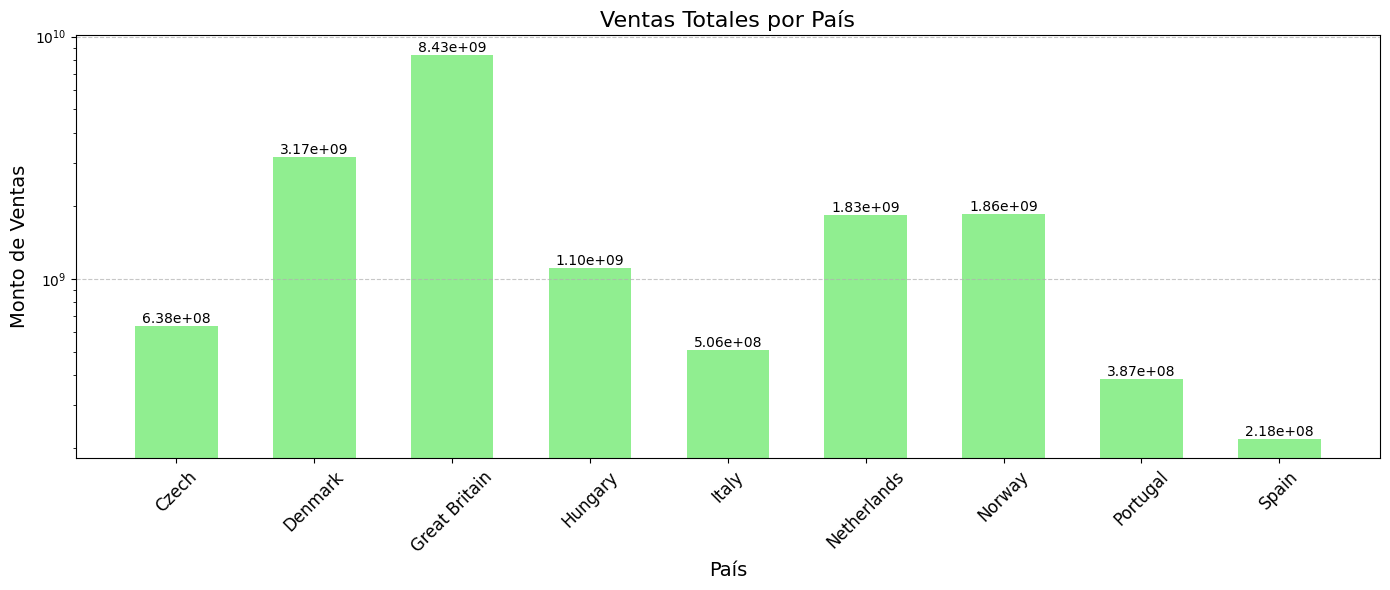

In [ ]:
# Crear un gráfico de barras de la distribución de ventas por país
plt.figure(figsize=(14, 6))  # Tamaño de la figura
plt.bar(distribucion_ventas_pais['COUNTRY'], distribucion_ventas_pais['AMOUNT'], color='lightgreen', width=0.6)  # Ajustar el ancho
plt.title('Ventas Totales por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Monto de Ventas', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Cambiar la escala del eje y a logarítmica
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor sobre las barras
for i, value in enumerate(distribucion_ventas_pais['AMOUNT']):
    plt.text(i, value, f'{value:.2e}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### En cada mes (predicciones y actuals)

Antes de nada voy a cambiar los números de los meses por el nombre, para que sea más interpretativo.

In [ ]:
# Mapeo de números a nombres de meses
meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

In [ ]:
ventas['MONTH_NAME'] = ventas['MONTH'].map(meses)

Como tenemos distintos años, vamos a diferenciar los meses y así podemos comparar también un año con otro.

In [ ]:
# Filtramos las ventas por año
ventas['YEAR'] = ventas['YEAR'].astype(int)  # Me aseguro de que la columna YEAR sea tipo entero
ventas_2023 = ventas[ventas['YEAR'] == 2023]
ventas_2024 = ventas[ventas['YEAR'] == 2024]
ventas_2025 = ventas[ventas['YEAR'] == 2025]

In [ ]:
ventas_2023_show = ventas_2023.groupby('MONTH_NAME')['AMOUNT'].sum().reset_index()
ventas_2023_show.sort_values(by='AMOUNT', ascending=False)

,MONTH_NAME,AMOUNT
2,Diciembre,1.049411e+09
9,Noviembre,9.085069e+08
10,Octubre,7.890140e+08
11,Septiembre,7.679450e+08
1,Agosto,7.474676e+08
5,Julio,6.288473e+08
6,Junio,5.304364e+08
8,Mayo,4.550054e+08
0,Abril,3.353694e+08
7,Marzo,2.696923e+08


In [ ]:
ventas_2024_show = ventas_2024.groupby('MONTH_NAME')['AMOUNT'].sum().reset_index()
ventas_2024_show.sort_values(by='AMOUNT', ascending=False)

,MONTH_NAME,AMOUNT
8,Mayo,1.065666e+09
6,Junio,1.057691e+09
7,Marzo,1.009033e+09
5,Julio,9.981979e+08
0,Abril,9.872097e+08
1,Agosto,9.357902e+08
3,Enero,8.448844e+08
4,Febrero,8.408047e+08
11,Septiembre,7.411355e+08
10,Octubre,6.168697e+08


In [ ]:
ventas_2025_show = ventas_2025.groupby('MONTH_NAME')['AMOUNT'].sum().reset_index()
ventas_2025_show.sort_values(by='AMOUNT', ascending=False)

,MONTH_NAME,AMOUNT
1,Enero,3.783377e+08
2,Febrero,2.977278e+08
3,Marzo,2.746941e+08
0,Abril,1.780384e+08
4,Mayo,9.511169e+07


Parece que en 2023 el mes en el que más se vendió fue en Diciembre, mientras que en 2024 fue en Mayo. En 2025 el mes cuando más se vendió fue en Enero, pero nos falta el resto de meses.

Sin embargo, en ambos años, el mes con menos ventas fue Enero.

Voy a hacer una función que me haga el gráfico porque así es más fácil hacerlo para cada año.

In [ ]:
# Función para crear el gráfico de ventas por mes
def crear_grafico_ventas(ventas_data, year):
    # Reemplazamos los números de meses por sus nombres
    ventas_data['MONTH_NAME'] = ventas_data['MONTH'].map(meses)

    # Calculamos la suma de AMOUNT por mes
    distribucion_ventas_mes = ventas_data.groupby('MONTH_NAME')['AMOUNT'].sum().reset_index()

    # Convertimos la columna MONTH_NAME a tipo categoría con orden
    meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                      'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

    distribucion_ventas_mes['MONTH_NAME'] = pd.Categorical(distribucion_ventas_mes['MONTH_NAME'], categories=meses_ordenados, ordered=True)

    # Ordenamos el DataFrame por MONTH_NAME
    distribucion_ventas_mes = distribucion_ventas_mes.sort_values('MONTH_NAME')

    # Creamos un gráfico de barras de la distribución de ventas por mes
    plt.figure(figsize=(14, 6))  # Tamaño de la figura
    plt.bar(distribucion_ventas_mes['MONTH_NAME'], distribucion_ventas_mes['AMOUNT'], color='lightgreen', width=0.6)  # Ajustar el ancho
    plt.title(f'Ventas Totales por Mes - Año {year}', fontsize=16)
    plt.xlabel('Mes', fontsize=14)
    plt.ylabel('Monto de Ventas', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)

    # Cambiamos la escala del eje y a logarítmica
    plt.yscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Agregamos etiquetas de valor sobre las barras
    for i, value in enumerate(distribucion_ventas_mes['AMOUNT']):
        plt.text(i, value, f'{value:.2e}', ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

<ipython-input-24-e188a51d47ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_data['MONTH_NAME'] = ventas_data['MONTH'].map(meses)


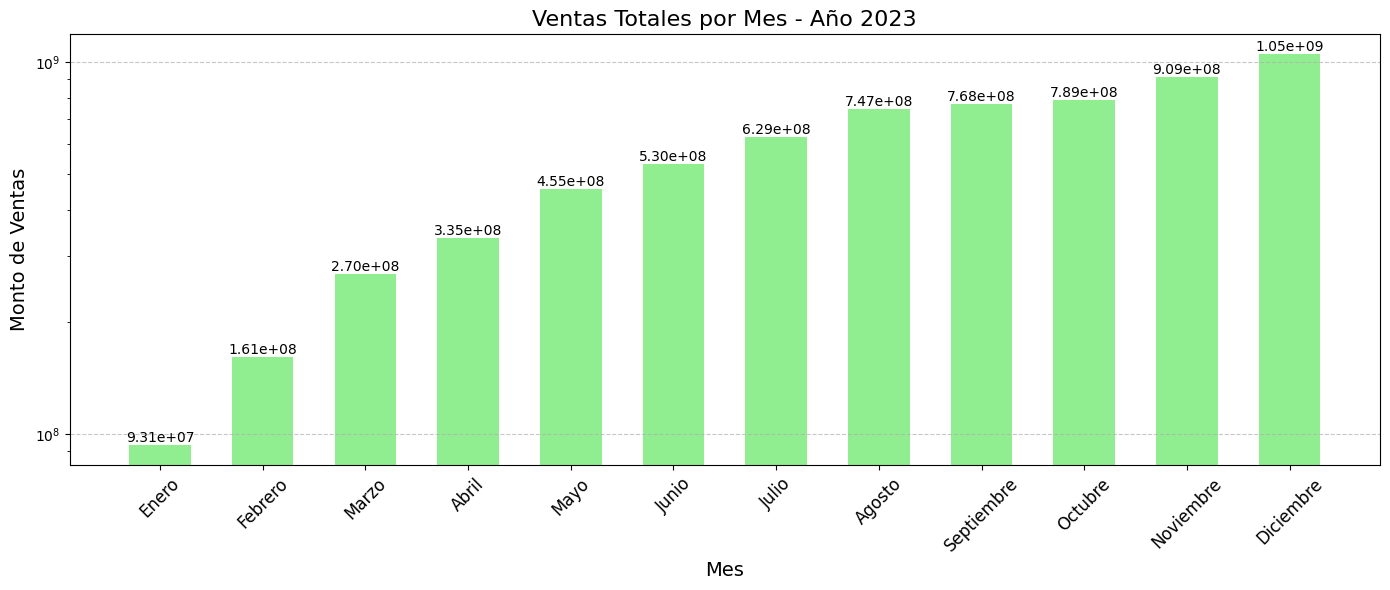

<ipython-input-24-e188a51d47ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_data['MONTH_NAME'] = ventas_data['MONTH'].map(meses)


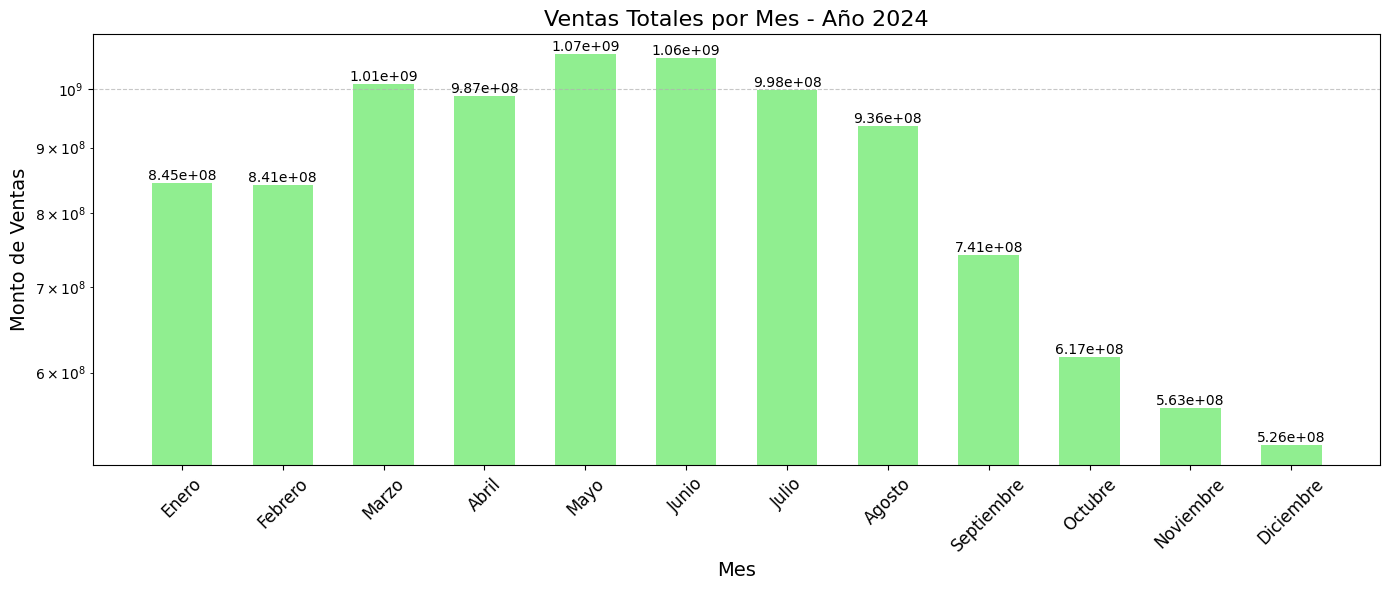

<ipython-input-24-e188a51d47ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_data['MONTH_NAME'] = ventas_data['MONTH'].map(meses)


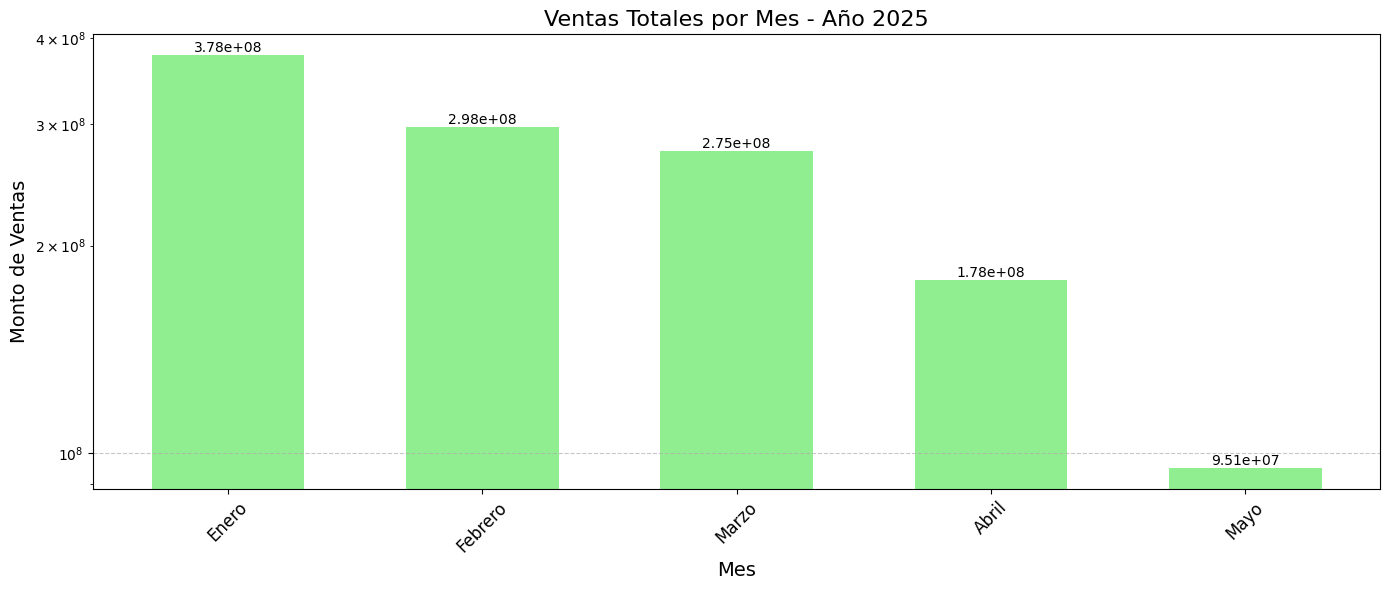

In [ ]:
# Creamos gráficos para ambos años
crear_grafico_ventas(ventas_2023, 2023)
crear_grafico_ventas(ventas_2024, 2024)
crear_grafico_ventas(ventas_2025, 2025)

Vamos a hacerlos todos en un mismo gráfico de barras apiladas para verlo de una forma más general, no tan en el detalle.

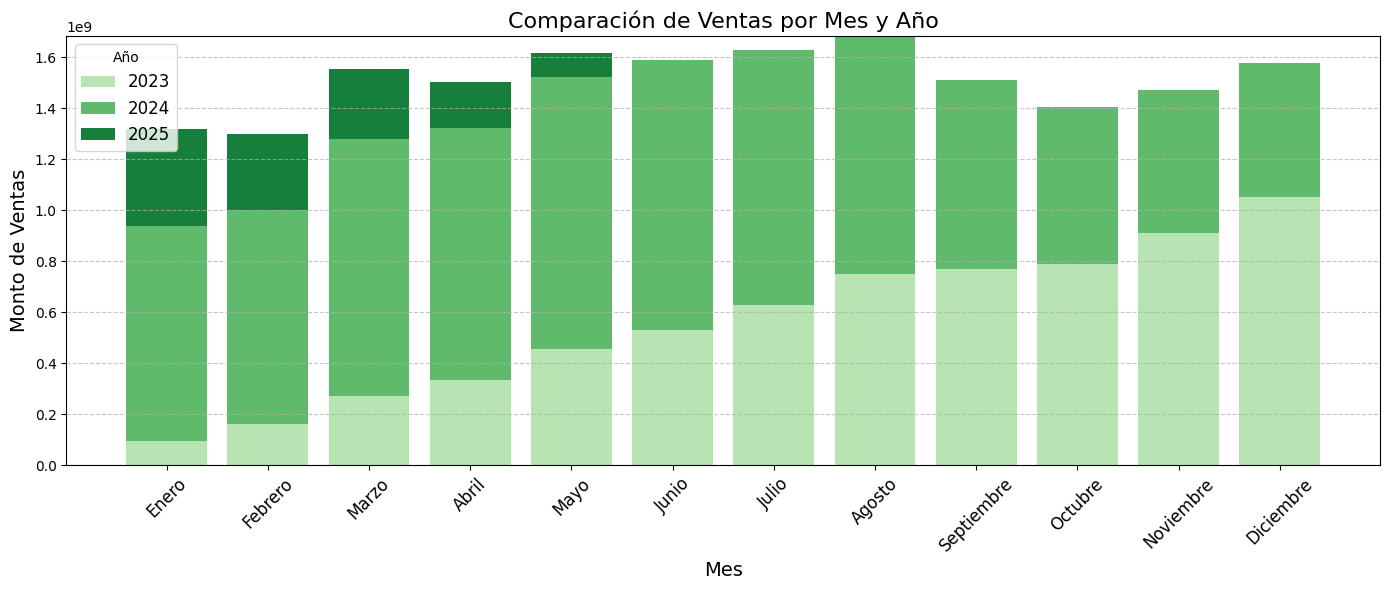

In [ ]:
# Agrupamos los datos por año y mes, calculando la suma de ventas
ventas_por_mes_ano = ventas.groupby(['YEAR', 'MONTH_NAME'])['AMOUNT'].sum().reset_index()

# Convertimos la columna 'MONTH_NAME' a tipo categórico con orden específico
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
                   'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ventas_por_mes_ano['MONTH_NAME'] = pd.Categorical(ventas_por_mes_ano['MONTH_NAME'], categories=meses_ordenados, ordered=True)

# Definimos una gama de colores
colores_verdes = plt.cm.Greens(np.linspace(0.3, 0.8, len(ventas_por_mes_ano['YEAR'].unique())))

# Creamos un DataFrame pivotado para que cada columna represente un año
ventas_pivot = ventas_por_mes_ano.pivot(index='MONTH_NAME', columns='YEAR', values='AMOUNT').fillna(0)
ventas_pivot = ventas_pivot.reindex(meses_ordenados)  # Aseguramos el orden de los meses

# Creamos el gráfico de barras apiladas
plt.figure(figsize=(14, 6))
bottom_values = np.zeros(len(ventas_pivot))  # Para controlar el apilado de las barras

# Graficamos las barras apiladas usando la misma gama de colores
for i, year in enumerate(ventas_pivot.columns):
    plt.bar(ventas_pivot.index, ventas_pivot[year], bottom=bottom_values, label=str(year), color=colores_verdes[i])
    bottom_values += ventas_pivot[year].values  # Actualizamos el fondo para la siguiente capa

# Configuraciones de etiquetas y título
plt.title('Comparación de Ventas por Mes y Año', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Monto de Ventas', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Año', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### En cada marca (predicciones y actuals)

Voy a aplicar lo mismo que en los otros apartados pero para la columna 'SUBRAND'.

In [ ]:
# Agrupamos por SUBBRAND y calculamos la suma de AMOUNT
distribucion_ventas_subbrand = ventas.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

# Ordenamos el DataFrame por AMOUNT
distribucion_ventas_subbrand = distribucion_ventas_subbrand.sort_values(by='AMOUNT', ascending=False)
distribucion_ventas_subbrand

,SUBBRAND,AMOUNT
4,Pepsi Max (L3),1.229538e+10
5,Pepsi Regular (L3),2.679291e+09
2,Lipton (L3),1.682028e+09
1,7up Free (L3),1.066603e+09
0,7up (L3),2.917746e+08
3,Mountain Dew (L3),1.316731e+08


Lo dibujamos

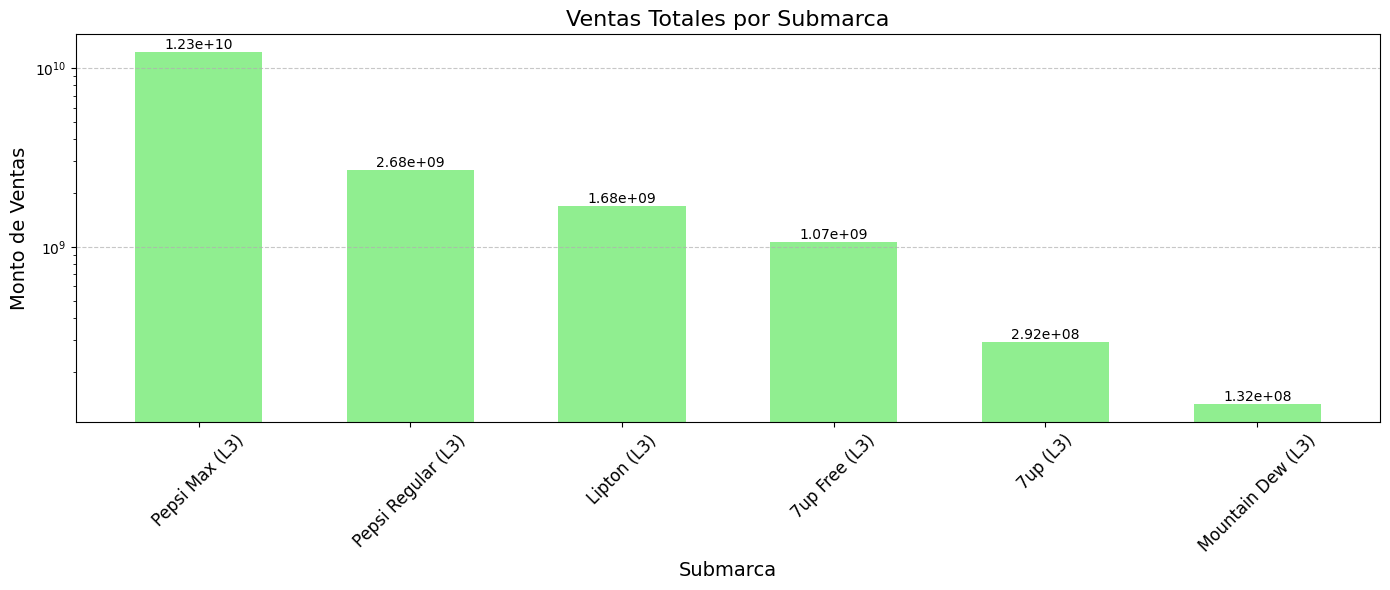

In [ ]:
# Creamos un gráfico de barras de la distribución de ventas por SUBBRAND
plt.figure(figsize=(14, 6))  # Tamaño de la figura
plt.bar(distribucion_ventas_subbrand['SUBBRAND'], distribucion_ventas_subbrand['AMOUNT'], color='lightgreen', width=0.6)  # Ajustar el ancho
plt.title('Ventas Totales por Submarca', fontsize=16)
plt.xlabel('Submarca', fontsize=14)
plt.ylabel('Monto de Ventas', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Cambiar la escala del eje y a logarítmica
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor sobre las barras
for i, value in enumerate(distribucion_ventas_subbrand['AMOUNT']):
    plt.text(i, value, f'{value:.2e}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Podemos observar que el producto que más se vende es la Pepsi Max y el que menos el Mountain Dew.

### **Para los gráficos anteriores estamos teniendo en cuenta las predicciones. A continuación realizaré el mismo código pero filtrando solamente por actuals, que son las ventas reales que se han realizado**

## **Distribución de las ventas (predicciones VS actuals)**

En este apartado vamos a realizar algo parecido a lo que hemos hecho en las distribuciones de arriba, pero solamente teniendo en cuenta aquellas ventas que se han terminado realizando.

### En cada país (predicciones VS actuals)

In [ ]:
# Filtramos las ventas reales y las predicciones
ventas_reales = ventas[ventas['SCENARIO'] == 'actual']
predicciones = ventas[ventas['SCENARIO'] == 'AI_forecast']

In [ ]:
# Agrupamos por país
ventas_reales_totales = ventas_reales.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
predicciones_totales = predicciones.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

In [ ]:
# Renombramos columnas para facilitar la fusión
ventas_reales_totales.rename(columns={'AMOUNT': 'REAL_SALES'}, inplace=True)
predicciones_totales.rename(columns={'AMOUNT': 'FORECASTED_SALES'}, inplace=True)

In [ ]:
# Fusionamos los DataFrames en función del país
ventas_comparacion_totales = pd.merge(ventas_reales_totales, predicciones_totales, on='COUNTRY', how='outer').fillna(0)
ventas_comparacion_totales.sort_values(by='REAL_SALES', ascending=False)

,COUNTRY,REAL_SALES,FORECASTED_SALES
2,Great Britain,3.347786e+08,8.092996e+09
5,Netherlands,6.395943e+07,1.767564e+09
1,Denmark,5.659668e+07,3.117362e+09
6,Norway,5.121406e+07,1.807751e+09
4,Italy,4.345404e+07,4.624423e+08
3,Hungary,4.153991e+07,1.062926e+09
0,Czech,3.535164e+07,6.031430e+08
7,Portugal,3.488807e+07,3.522935e+08
8,Spain,8.131266e+06,2.103623e+08


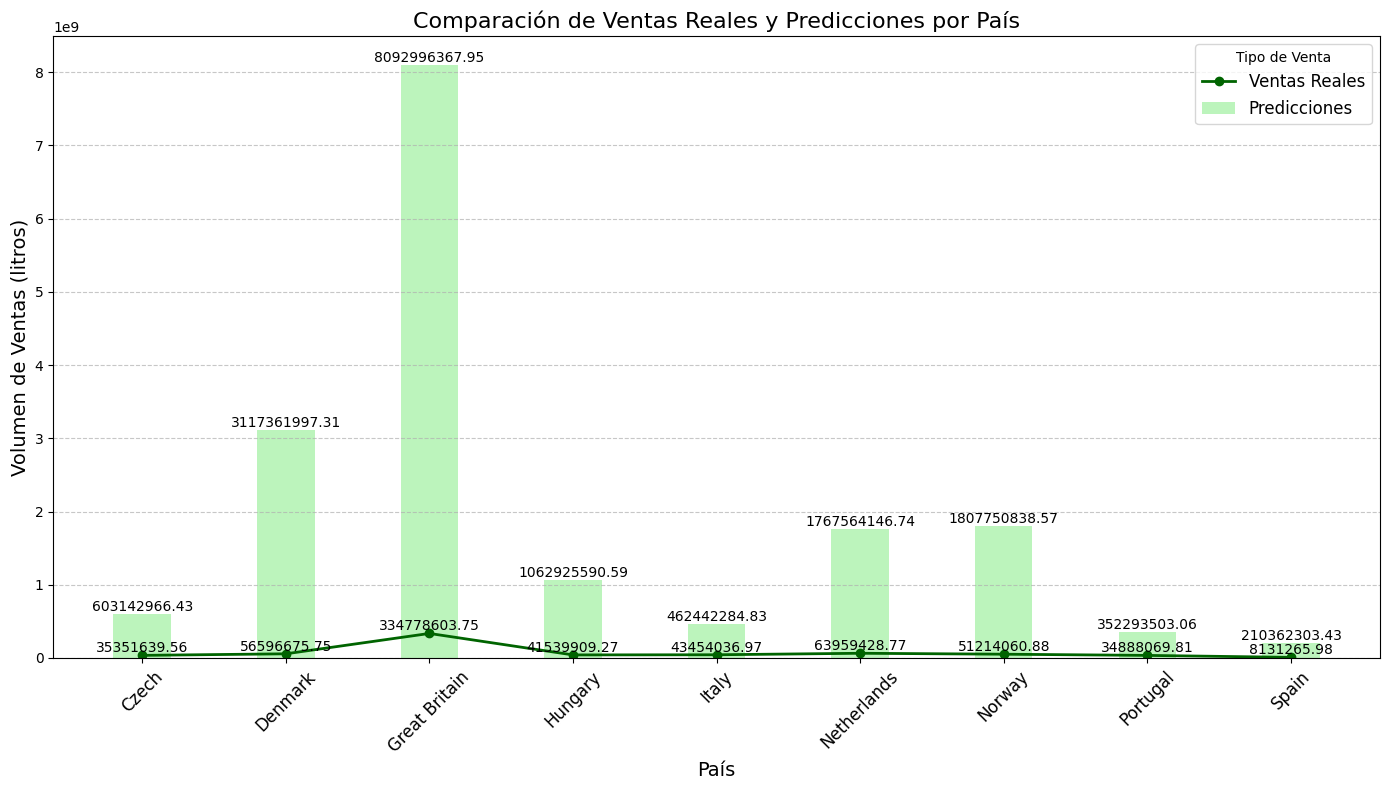

In [ ]:
# Creamos el gráfico
plt.figure(figsize=(14, 8))

# Graficamos las predicciones como barras
bar_width = 0.4  # Ancho de las barras
bar_positions = range(len(ventas_comparacion_totales['COUNTRY']))  # Posiciones de las barras

bars = plt.bar(bar_positions, ventas_comparacion_totales['FORECASTED_SALES'], label='Predicciones', alpha=0.6, color='lightgreen', width=bar_width)

# Añadimos etiquetas de valor sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Graficamos las ventas reales como línea con puntos
plt.plot(ventas_comparacion_totales['COUNTRY'], ventas_comparacion_totales['REAL_SALES'], label='Ventas Reales', color='darkgreen', marker='o', linewidth=2)

# Añadimos etiquetas de valor sobre los puntos de ventas reales
for i, value in enumerate(ventas_comparacion_totales['REAL_SALES']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Añadimos etiquetas y título
plt.title('Comparación de Ventas Reales y Predicciones por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Volumen de Ventas (litros)', fontsize=14)
plt.xticks(bar_positions, ventas_comparacion_totales['COUNTRY'], rotation=45, fontsize=12)
plt.legend(title='Tipo de Venta', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Observamos que nos está sumando todos los valores. Voy a dividir por años (para que no esté tan sesgado). Aunque haya predicciones para 2025, no hay valores de actuals para comparar, así que no tiene mucho sentido hacerlo para 2025.

Una forma de comprobarlo es coger las ventas de actuals y hacer un `unique()` del YEAR.


In [ ]:
ventas_reales['YEAR'].unique()

array([2023, 2024])

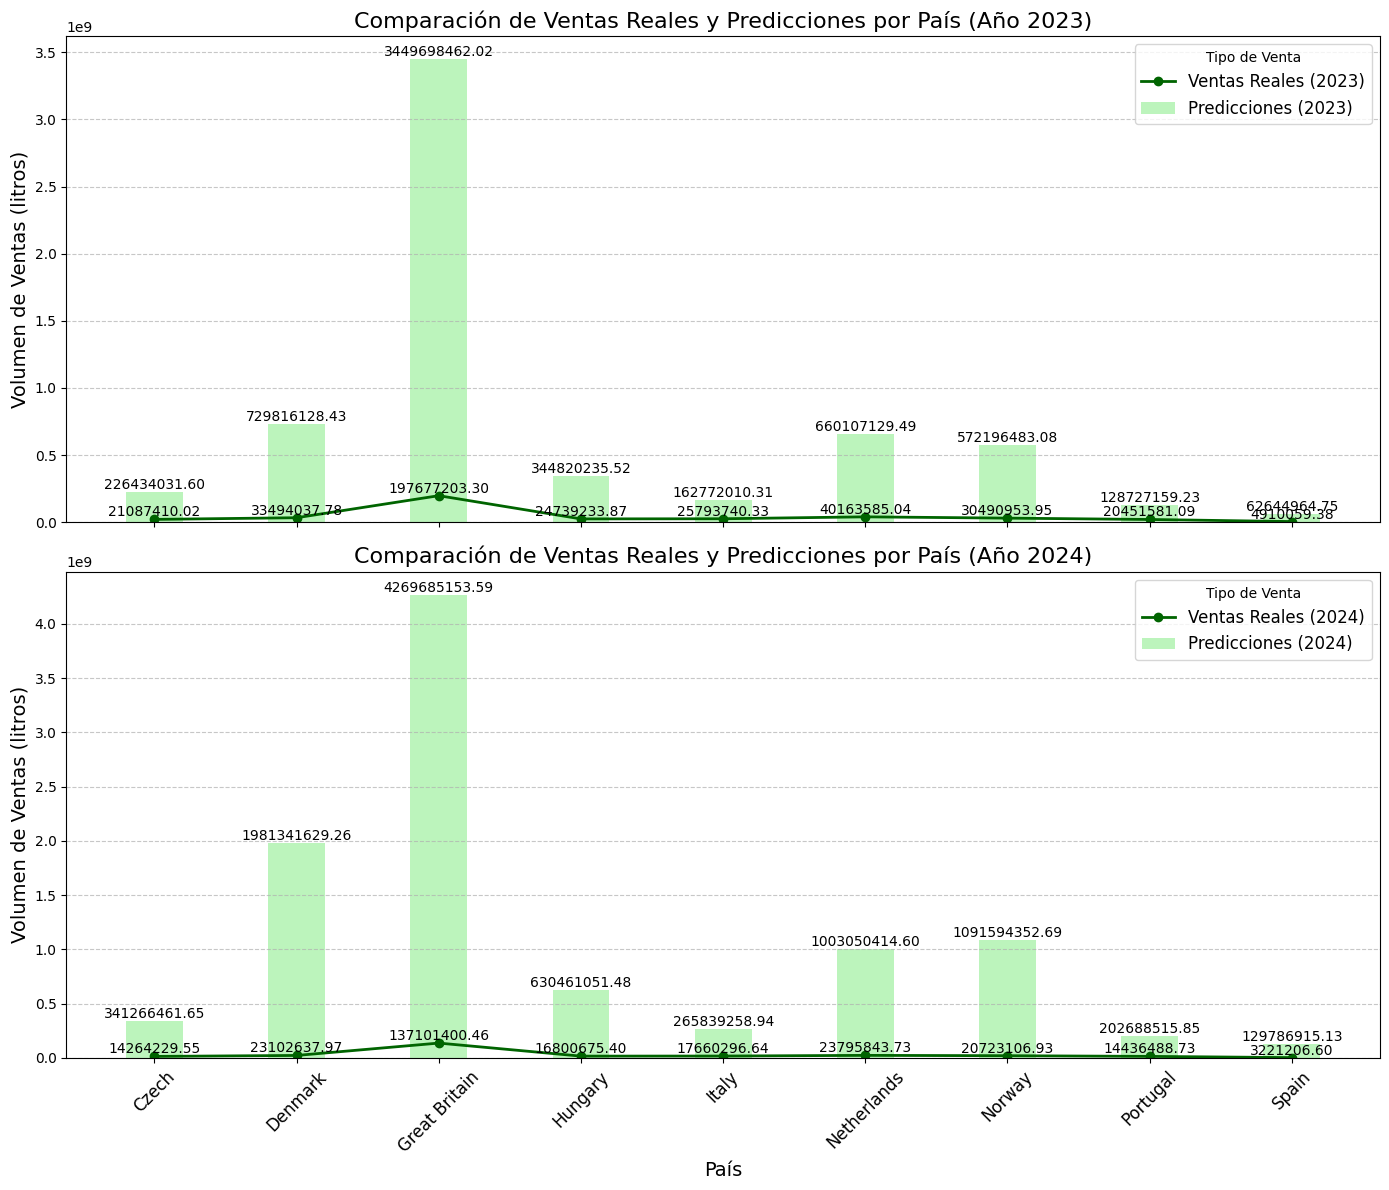

In [ ]:
# Creamos la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# --------- Gráfico para el año 2023 ---------
# Filtramos las ventas reales del año 2023
ventas_reales_2023 = ventas[(ventas['SCENARIO'] == 'actual') & (ventas['YEAR'] == 2023)]

# Filtramos las predicciones para el año 2023 (hechas en el año 2023)
predicciones_2023 = ventas[(ventas['SCENARIO'] == 'AI_forecast') & (ventas['YEAR'] == 2023)]

# Agrupamos por país
ventas_reales_totales_2023 = ventas_reales_2023.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
predicciones_totales_2023 = predicciones_2023.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Renombramos columnas para facilitar el cruce
ventas_reales_totales_2023.rename(columns={'AMOUNT': 'REAL_SALES'}, inplace=True)
predicciones_totales_2023.rename(columns={'AMOUNT': 'FORECASTED_SALES'}, inplace=True)

# Cruzamos los DataFrames en función del país
ventas_comparacion_totales_2023 = pd.merge(ventas_reales_totales_2023, predicciones_totales_2023, on='COUNTRY', how='outer').fillna(0)

# Graficamos las predicciones como barras
bar_width = 0.4  # Ancho de las barras
bar_positions = range(len(ventas_comparacion_totales_2023['COUNTRY']))  # Posiciones de las barras

bars_2023 = axs[0].bar(bar_positions, ventas_comparacion_totales_2023['FORECASTED_SALES'], label='Predicciones (2023)', alpha=0.6, color='lightgreen', width=bar_width)

# Aádimos etiquetas de valor sobre las barras
for bar in bars_2023:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Graficamos las ventas reales como línea con puntos
axs[0].plot(ventas_comparacion_totales_2023['COUNTRY'], ventas_comparacion_totales_2023['REAL_SALES'], label='Ventas Reales (2023)', color='darkgreen', marker='o', linewidth=2)

# Añadimos etiquetas de valor sobre los puntos de ventas reales
for i, value in enumerate(ventas_comparacion_totales_2023['REAL_SALES']):
    axs[0].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Añadimos etiquetas y título para el primer subplot
axs[0].set_title('Comparación de Ventas Reales y Predicciones por País (Año 2023)', fontsize=16)
axs[0].set_ylabel('Volumen de Ventas (litros)', fontsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].legend(title='Tipo de Venta', fontsize=12)

# --------- Gráfico para el año 2024 ---------
# Filtramos las ventas reales del año 2024
ventas_reales_2024 = ventas[(ventas['SCENARIO'] == 'actual') & (ventas['YEAR'] == 2024)]

# Filtramos las predicciones para el año 2024 (hechas en el año 2024)
predicciones_2024 = ventas[(ventas['SCENARIO'] == 'AI_forecast') & (ventas['YEAR'] == 2024)]

# Agrupamos por país
ventas_reales_totales_2024 = ventas_reales_2024.groupby('COUNTRY')['AMOUNT'].sum().reset_index()
predicciones_totales_2024 = predicciones_2024.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Renombramos columnas para facilitar el cruce
ventas_reales_totales_2024.rename(columns={'AMOUNT': 'REAL_SALES'}, inplace=True)
predicciones_totales_2024.rename(columns={'AMOUNT': 'FORECASTED_SALES'}, inplace=True)

# Cruzamos los DataFrames en función del país
ventas_comparacion_totales_2024 = pd.merge(ventas_reales_totales_2024, predicciones_totales_2024, on='COUNTRY', how='outer').fillna(0)

# Graficamos las predicciones como barras
bars_2024 = axs[1].bar(bar_positions, ventas_comparacion_totales_2024['FORECASTED_SALES'], label='Predicciones (2024)', alpha=0.6, color='lightgreen', width=bar_width)

# Añadimos etiquetas de valor sobre las barras
for bar in bars_2024:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Graficamos las ventas reales como línea con puntos
axs[1].plot(ventas_comparacion_totales_2024['COUNTRY'], ventas_comparacion_totales_2024['REAL_SALES'], label='Ventas Reales (2024)', color='darkgreen', marker='o', linewidth=2)

# Añadimos etiquetas de valor sobre los puntos de ventas reales
for i, value in enumerate(ventas_comparacion_totales_2024['REAL_SALES']):
    axs[1].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Añadimos etiquetas y título para el segundo subplot
axs[1].set_title('Comparación de Ventas Reales y Predicciones por País (Año 2024)', fontsize=16)
axs[1].set_xlabel('País', fontsize=14)
axs[1].set_ylabel('Volumen de Ventas (litros)', fontsize=14)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].legend(title='Tipo de Venta', fontsize=12)

# Configuración del eje x
plt.xticks(bar_positions, ventas_comparacion_totales_2024['COUNTRY'], rotation=45, fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
ventas_comparacion_totales_2024.sort_values(by='REAL_SALES', ascending=False)

,COUNTRY,REAL_SALES,FORECASTED_SALES
2,Great Britain,1.371014e+08,4.269685e+09
5,Netherlands,2.379584e+07,1.003050e+09
1,Denmark,2.310264e+07,1.981342e+09
6,Norway,2.072311e+07,1.091594e+09
4,Italy,1.766030e+07,2.658393e+08
3,Hungary,1.680068e+07,6.304611e+08
7,Portugal,1.443649e+07,2.026885e+08
0,Czech,1.426423e+07,3.412665e+08
8,Spain,3.221207e+06,1.297869e+08


In [ ]:
ventas_comparacion_totales_2023.sort_values(by='REAL_SALES', ascending=False)

,COUNTRY,REAL_SALES,FORECASTED_SALES
2,Great Britain,1.976772e+08,3.449698e+09
5,Netherlands,4.016359e+07,6.601071e+08
1,Denmark,3.349404e+07,7.298161e+08
6,Norway,3.049095e+07,5.721965e+08
4,Italy,2.579374e+07,1.627720e+08
3,Hungary,2.473923e+07,3.448202e+08
0,Czech,2.108741e+07,2.264340e+08
7,Portugal,2.045158e+07,1.287272e+08
8,Spain,4.910059e+06,6.264496e+07


Podemos observar que, en general, en 2024 las predicciones que se hicieron en 2024 son más altas que las de 2023 y, sin embargo, las ventas reales son más bajas.

Observamos además que, de un año a otro, Portugal ha tenido menos ventas que la República Checa, haciendo que esta última suba de puesto en 2024. También podemos ver, tanto gráfica como numéricamente, que Gran Bretaña se mantiene en el primer puesto y España en el último.

### En cada mes (predicciones VS actuals)

In [ ]:
# Mapeo de números a nombres de meses
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
ventas['MONTH_NAME'] = ventas['MONTH'].map(meses)

In [ ]:
# Lista ordenada de meses
meses_ordenados = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                   'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Convertir 'MONTH_NAME' a una categoría con el orden adecuado
ventas['MONTH_NAME'] = pd.Categorical(ventas['MONTH_NAME'], categories=meses_ordenados, ordered=True)

<ipython-input-40-8e01d6e147e7>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_reales_mes_totales_2023 = ventas_reales_mes_2023.groupby('MONTH_NAME')['AMOUNT'].sum().reindex(meses_ordenados).reset_index()
<ipython-input-40-8e01d6e147e7>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  predicciones_totales_mes_2023 = predicciones_mes_2023.groupby('MONTH_NAME')['AMOUNT'].sum().reindex(meses_ordenados).reset_index()
<ipython-input-40-8e01d6e147e7>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curre

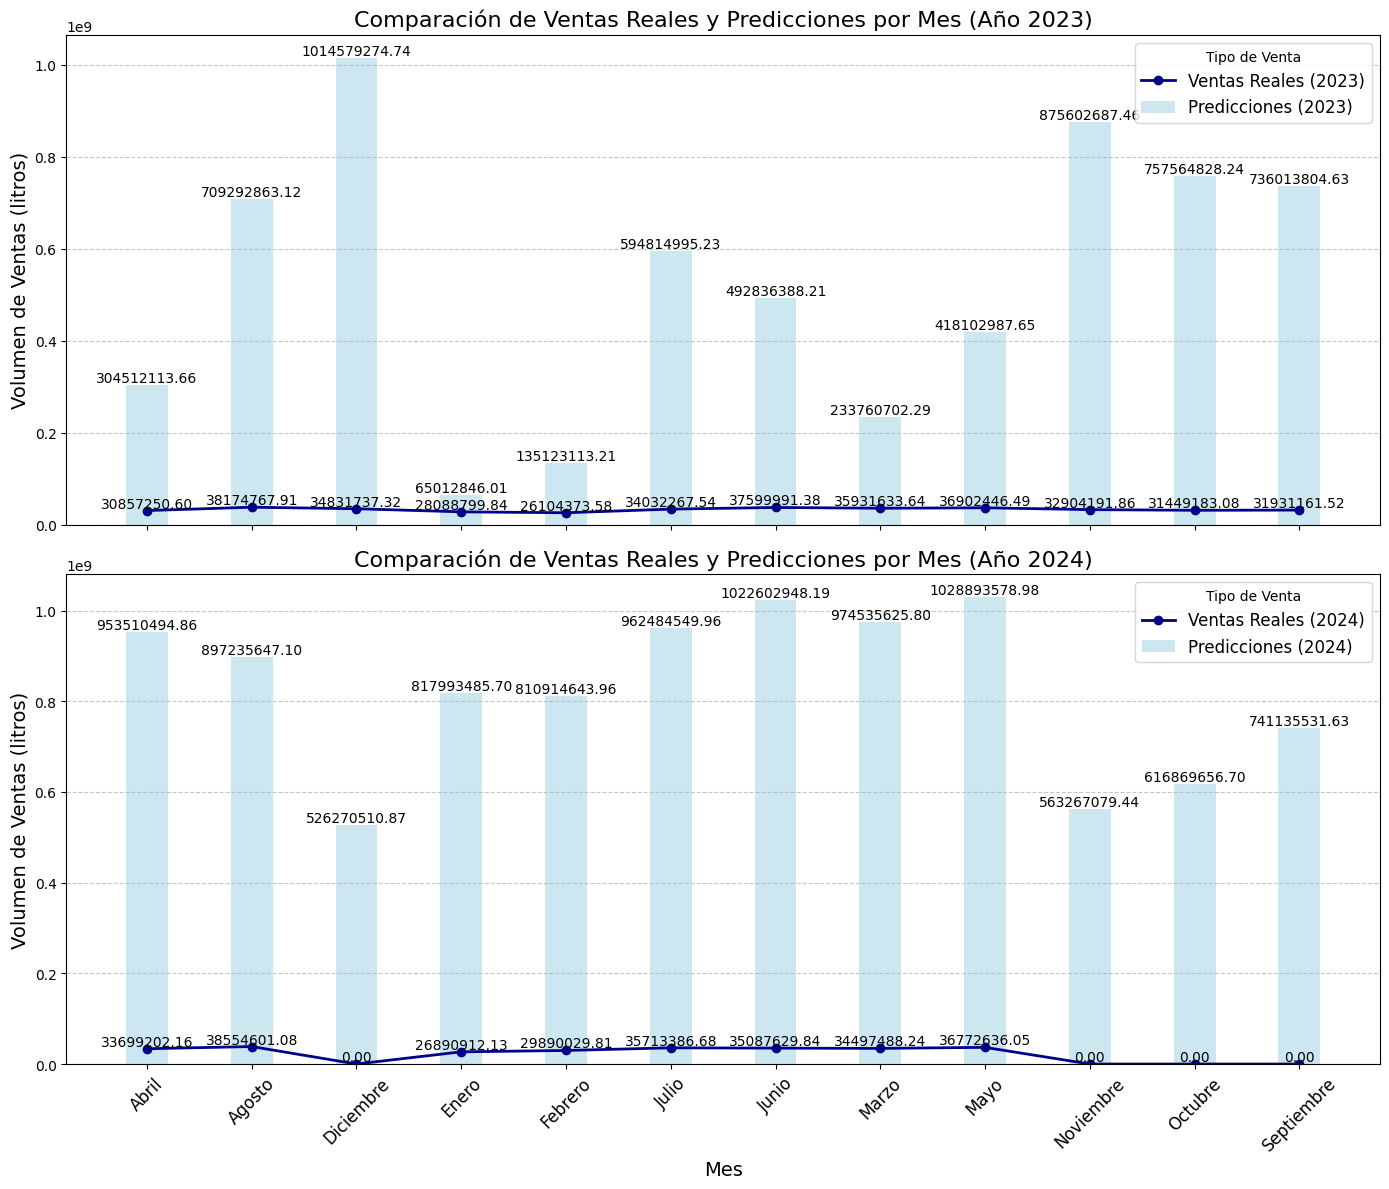

In [ ]:
# Crear la figura y subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# --------- Gráfico para el año 2023 ---------
ventas_reales_mes_2023 = ventas[(ventas['SCENARIO'] == 'actual') & (ventas['YEAR'] == 2023)]
predicciones_mes_2023 = ventas[(ventas['SCENARIO'] == 'AI_forecast') & (ventas['YEAR'] == 2023)]

# Agrupamos por 'MONTH_NAME' asegurando el orden
ventas_reales_mes_totales_2023 = ventas_reales_mes_2023.groupby('MONTH_NAME')['AMOUNT'].sum().reindex(meses_ordenados).reset_index()
predicciones_totales_mes_2023 = predicciones_mes_2023.groupby('MONTH_NAME')['AMOUNT'].sum().reindex(meses_ordenados).reset_index()

# Renombramos columnas para facilitar el cruce
ventas_reales_mes_totales_2023.rename(columns={'AMOUNT': 'REAL_SALES'}, inplace=True)
predicciones_totales_mes_2023.rename(columns={'AMOUNT': 'FORECASTED_SALES'}, inplace=True)

# Cruzamos los DataFrames en función del mes
ventas_comparacion_totales_2023_mes = pd.merge(ventas_reales_mes_totales_2023, predicciones_totales_mes_2023, on='MONTH_NAME', how='outer').fillna(0)

# Graficamos las predicciones como barras
bar_width = 0.4  # Ancho de las barras
bar_positions = range(len(ventas_comparacion_totales_2023_mes['MONTH_NAME']))  # Posiciones de las barras

bars_2023 = axs[0].bar(bar_positions, ventas_comparacion_totales_2023_mes['FORECASTED_SALES'], label='Predicciones (2023)', alpha=0.6, color='lightblue', width=bar_width)

for bar in bars_2023:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

axs[0].plot(ventas_comparacion_totales_2023_mes['MONTH_NAME'], ventas_comparacion_totales_2023_mes['REAL_SALES'], label='Ventas Reales (2023)', color='darkblue', marker='o', linewidth=2)

for i, value in enumerate(ventas_comparacion_totales_2023_mes['REAL_SALES']):
    axs[0].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

axs[0].set_title('Comparación de Ventas Reales y Predicciones por Mes (Año 2023)', fontsize=16)
axs[1].set_xlabel('Mes', fontsize=14)
axs[0].set_ylabel('Volumen de Ventas (litros)', fontsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].legend(title='Tipo de Venta', fontsize=12)

# --------- Gráfico para el año 2024 ---------
ventas_reales_2024_mes = ventas[(ventas['SCENARIO'] == 'actual') & (ventas['YEAR'] == 2024)]
predicciones_2024_mes = ventas[(ventas['SCENARIO'] == 'AI_forecast') & (ventas['YEAR'] == 2024)]

ventas_reales_totales_2024_mes = ventas_reales_2024_mes.groupby('MONTH_NAME')['AMOUNT'].sum().reindex(meses_ordenados).reset_index()
predicciones_totales_2024_mes = predicciones_2024_mes.groupby('MONTH_NAME')['AMOUNT'].sum().reindex(meses_ordenados).reset_index()

ventas_reales_totales_2024_mes.rename(columns={'AMOUNT': 'REAL_SALES'}, inplace=True)
predicciones_totales_2024_mes.rename(columns={'AMOUNT': 'FORECASTED_SALES'}, inplace=True)

ventas_comparacion_totales_2024_mes = pd.merge(ventas_reales_totales_2024_mes, predicciones_totales_2024_mes, on='MONTH_NAME', how='outer').fillna(0)

bars_2024 = axs[1].bar(bar_positions, ventas_comparacion_totales_2024_mes['FORECASTED_SALES'], label='Predicciones (2024)', alpha=0.6, color='lightblue', width=bar_width)

for bar in bars_2024:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

axs[1].plot(ventas_comparacion_totales_2024_mes['MONTH_NAME'], ventas_comparacion_totales_2024_mes['REAL_SALES'], label='Ventas Reales (2024)', color='darkblue', marker='o', linewidth=2)

for i, value in enumerate(ventas_comparacion_totales_2024_mes['REAL_SALES']):
    axs[1].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

axs[1].set_title('Comparación de Ventas Reales y Predicciones por Mes (Año 2024)', fontsize=16)
axs[1].set_xlabel('Mes', fontsize=14)
axs[1].set_ylabel('Volumen de Ventas (litros)', fontsize=14)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].legend(title='Tipo de Venta', fontsize=12)

# Configuración del eje x
plt.xticks(bar_positions, ventas_comparacion_totales_2024_mes['MONTH_NAME'], rotation=45, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
ventas_comparacion_totales_2023_mes.sort_values(by='REAL_SALES', ascending=False)

,MONTH_NAME,REAL_SALES,FORECASTED_SALES
1,Agosto,3.817477e+07,7.092929e+08
6,Junio,3.759999e+07,4.928364e+08
8,Mayo,3.690245e+07,4.181030e+08
7,Marzo,3.593163e+07,2.337607e+08
2,Diciembre,3.483174e+07,1.014579e+09
5,Julio,3.403227e+07,5.948150e+08
9,Noviembre,3.290419e+07,8.756027e+08
11,Septiembre,3.193116e+07,7.360138e+08
10,Octubre,3.144918e+07,7.575648e+08
0,Abril,3.085725e+07,3.045121e+08


In [ ]:
ventas_comparacion_totales_2024_mes.sort_values(by='REAL_SALES', ascending=False)

,MONTH_NAME,REAL_SALES,FORECASTED_SALES
1,Agosto,3.855460e+07,8.972356e+08
8,Mayo,3.677264e+07,1.028894e+09
5,Julio,3.571339e+07,9.624845e+08
6,Junio,3.508763e+07,1.022603e+09
7,Marzo,3.449749e+07,9.745356e+08
0,Abril,3.369920e+07,9.535105e+08
4,Febrero,2.989003e+07,8.109146e+08
3,Enero,2.689091e+07,8.179935e+08
2,Diciembre,0.000000e+00,5.262705e+08
9,Noviembre,0.000000e+00,5.632671e+08


Agosto destaca en ambos años como el mes con mayores ventas reales. Los meses de verano (mayo a agosto) tienden a ser los más fuertes, lo que indica una posible estacionalidad o un aumento en la demanda en estos meses. Lo veremos en el siguiente apartado.

Las predicciones en ambos años suelen ser mucho más altas que las ventas reales, como nos pasaba en la distribución anterior, especialmente en meses de cierre de año como diciembre y noviembre, donde las ventas reales en 2024 son incluso nulas, lo que me hace pensar que no hay datos de actuals para estos meses (lo cual tiene sentido teniendo en cuenta que esta base de datos será de este año).

Podemos ver que el tercer trimestre (junio-sep) es el que más boom tiene, aunque destaca mayo en ambos casos también. Esto tiene sentido por lo que decíamos al principio, en los meses de verano las ventas tienden a subir.

### En cada marca (predicciones VS actuals)

Voy a aplicar lo mismo que en los otros apartados pero para la columna 'SUBRAND'.

In [ ]:
# Agrupamos por país
ventas_reales_totales = ventas_reales.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
predicciones_totales = predicciones.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

In [ ]:
# Renombramos columnas para facilitar la fusión
ventas_reales_totales.rename(columns={'AMOUNT': 'REAL_SALES'}, inplace=True)
predicciones_totales.rename(columns={'AMOUNT': 'FORECASTED_SALES'}, inplace=True)

In [ ]:
# Fusionamos los DataFrames en función del país
ventas_comparacion_totales = pd.merge(ventas_reales_totales, predicciones_totales, on='SUBBRAND', how='outer').fillna(0)
ventas_comparacion_totales.sort_values(by='REAL_SALES', ascending=False)

,SUBBRAND,REAL_SALES,FORECASTED_SALES
4,Pepsi Max (L3),3.966987e+08,1.189868e+10
5,Pepsi Regular (L3),1.398307e+08,2.539461e+09
2,Lipton (L3),7.286515e+07,1.609163e+09
1,7up Free (L3),3.427630e+07,1.032327e+09
0,7up (L3),1.876851e+07,2.730061e+08
3,Mountain Dew (L3),7.474391e+06,1.241987e+08


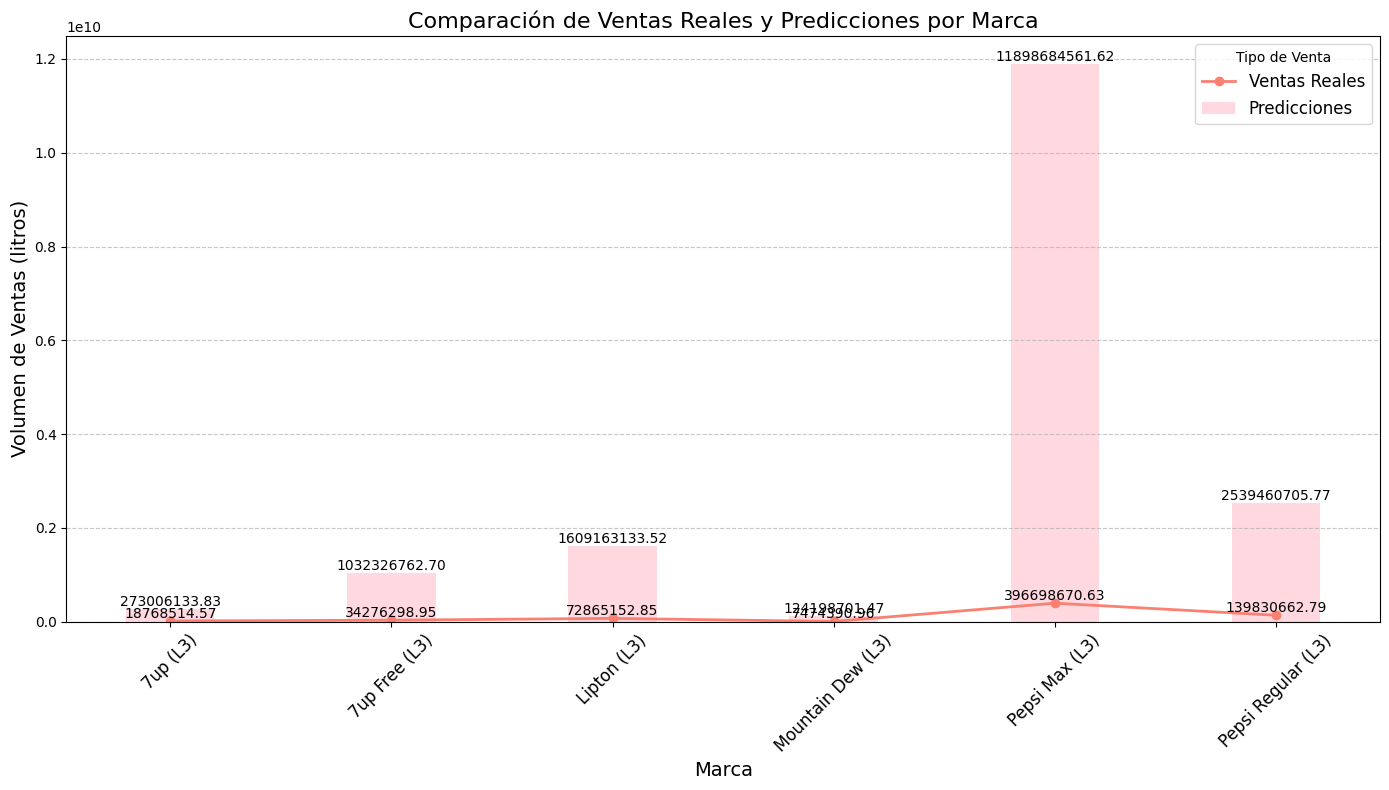

In [ ]:
# Creamos el gráfico
plt.figure(figsize=(14, 8))

# Graficamos las predicciones como barras
bar_width = 0.4  # Ancho de las barras
bar_positions = range(len(ventas_comparacion_totales['SUBBRAND']))  # Posiciones de las barras

bars = plt.bar(bar_positions, ventas_comparacion_totales['FORECASTED_SALES'], label='Predicciones', alpha=0.6, color='pink', width=bar_width)

# Añadimos etiquetas de valor sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Graficamos las ventas reales como línea con puntos
plt.plot(ventas_comparacion_totales['SUBBRAND'], ventas_comparacion_totales['REAL_SALES'], label='Ventas Reales', color='salmon', marker='o', linewidth=2)

# Añadimos etiquetas de valor sobre los puntos de ventas reales
for i, value in enumerate(ventas_comparacion_totales['REAL_SALES']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Añadimos etiquetas y título
plt.title('Comparación de Ventas Reales y Predicciones por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Volumen de Ventas (litros)', fontsize=14)
plt.xticks(bar_positions, ventas_comparacion_totales['SUBBRAND'], rotation=45, fontsize=12)
plt.legend(title='Tipo de Venta', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

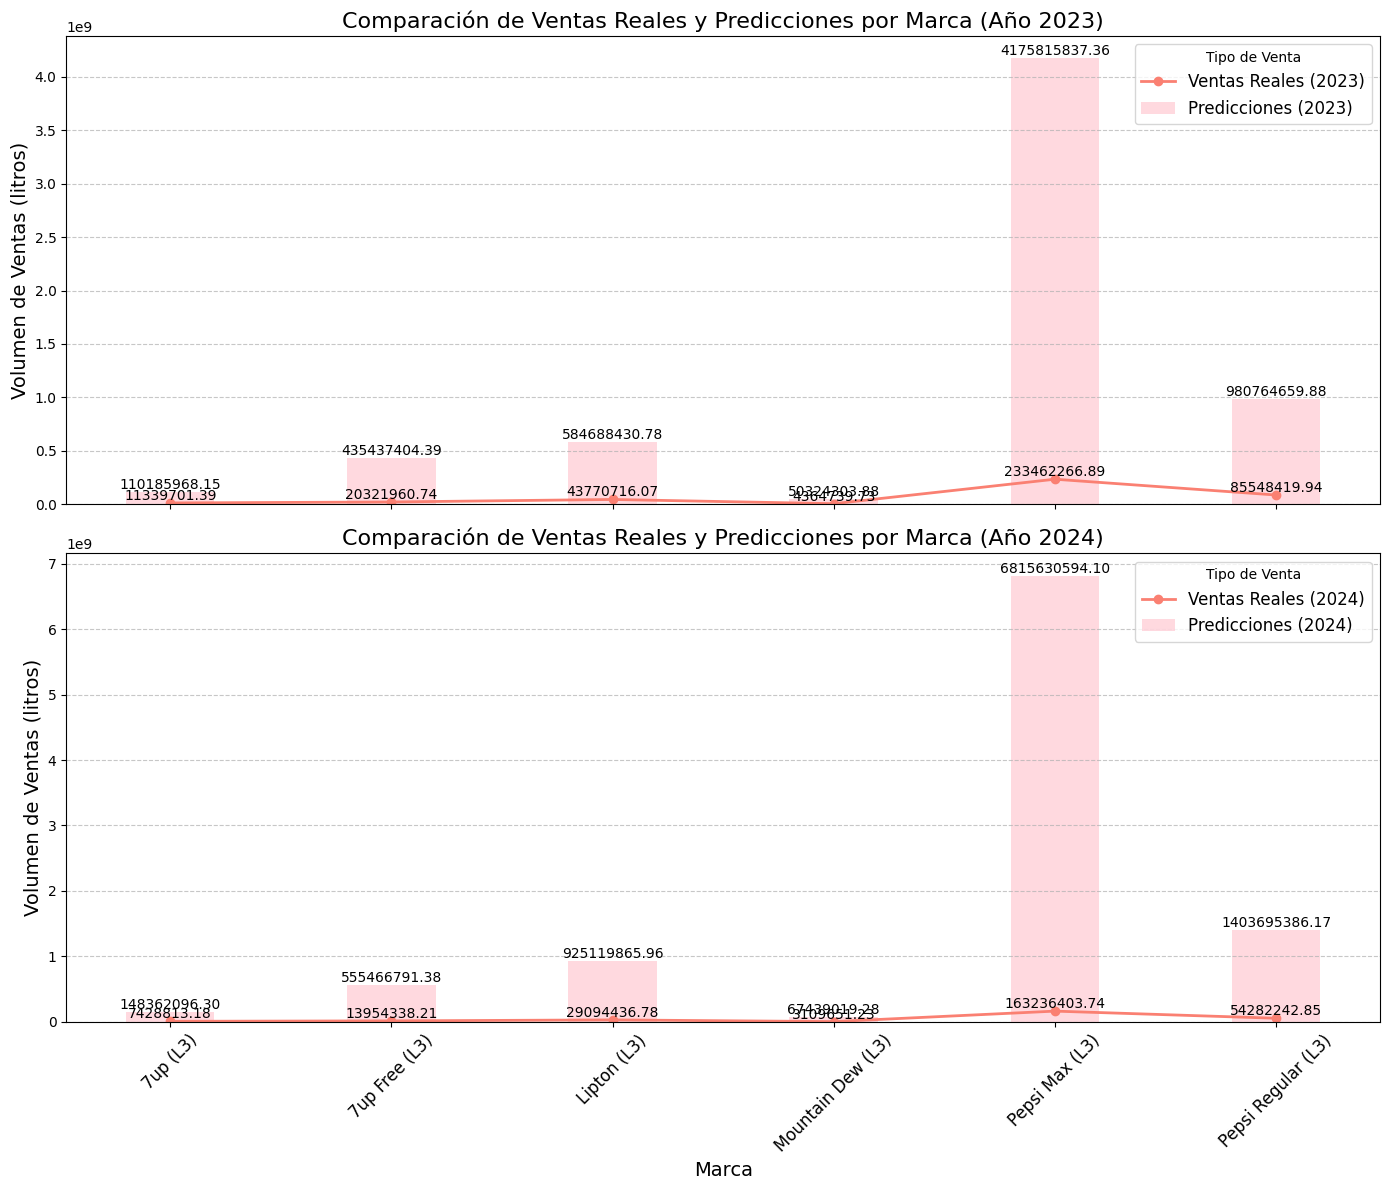

In [ ]:
# Creamos la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# --------- Gráfico para el año 2023 ---------
# Filtramos las ventas reales del año 2023
ventas_reales_2023 = ventas[(ventas['SCENARIO'] == 'actual') & (ventas['YEAR'] == 2023)]

# Filtramos las predicciones para el año 2023 (hechas en el año 2023)
predicciones_2023 = ventas[(ventas['SCENARIO'] == 'AI_forecast') & (ventas['YEAR'] == 2023)]

# Agrupamos por país
ventas_reales_totales_2023 = ventas_reales_2023.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
predicciones_totales_2023 = predicciones_2023.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

# Renombramos columnas para facilitar el cruce
ventas_reales_totales_2023.rename(columns={'AMOUNT': 'REAL_SALES'}, inplace=True)
predicciones_totales_2023.rename(columns={'AMOUNT': 'FORECASTED_SALES'}, inplace=True)

# Cruzamos los DataFrames en función del país
ventas_comparacion_totales_2023 = pd.merge(ventas_reales_totales_2023, predicciones_totales_2023, on='SUBBRAND', how='outer').fillna(0)

# Graficamos las predicciones como barras
bar_width = 0.4  # Ancho de las barras
bar_positions = range(len(ventas_comparacion_totales_2023['SUBBRAND']))  # Posiciones de las barras

bars_2023 = axs[0].bar(bar_positions, ventas_comparacion_totales_2023['FORECASTED_SALES'], label='Predicciones (2023)', alpha=0.6, color='pink', width=bar_width)

# Aádimos etiquetas de valor sobre las barras
for bar in bars_2023:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Graficamos las ventas reales como línea con puntos
axs[0].plot(ventas_comparacion_totales_2023['SUBBRAND'], ventas_comparacion_totales_2023['REAL_SALES'], label='Ventas Reales (2023)', color='salmon', marker='o', linewidth=2)

# Añadimos etiquetas de valor sobre los puntos de ventas reales
for i, value in enumerate(ventas_comparacion_totales_2023['REAL_SALES']):
    axs[0].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Añadimos etiquetas y título para el primer subplot
axs[0].set_title('Comparación de Ventas Reales y Predicciones por Marca (Año 2023)', fontsize=16)
axs[1].set_xlabel('Marca', fontsize=14)
axs[0].set_ylabel('Volumen de Ventas (litros)', fontsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].legend(title='Tipo de Venta', fontsize=12)

# --------- Gráfico para el año 2024 ---------
# Filtramos las ventas reales del año 2024
ventas_reales_2024 = ventas[(ventas['SCENARIO'] == 'actual') & (ventas['YEAR'] == 2024)]

# Filtramos las predicciones para el año 2024 (hechas en el año 2024)
predicciones_2024 = ventas[(ventas['SCENARIO'] == 'AI_forecast') & (ventas['YEAR'] == 2024)]

# Agrupamos por país
ventas_reales_totales_2024 = ventas_reales_2024.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
predicciones_totales_2024 = predicciones_2024.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

# Renombramos columnas para facilitar el cruce
ventas_reales_totales_2024.rename(columns={'AMOUNT': 'REAL_SALES'}, inplace=True)
predicciones_totales_2024.rename(columns={'AMOUNT': 'FORECASTED_SALES'}, inplace=True)

# Cruzamos los DataFrames en función del país
ventas_comparacion_totales_2024 = pd.merge(ventas_reales_totales_2024, predicciones_totales_2024, on='SUBBRAND', how='outer').fillna(0)

# Graficamos las predicciones como barras
bars_2024 = axs[1].bar(bar_positions, ventas_comparacion_totales_2024['FORECASTED_SALES'], label='Predicciones (2024)', alpha=0.6, color='pink', width=bar_width)

# Añadimos etiquetas de valor sobre las barras
for bar in bars_2024:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Graficamos las ventas reales como línea con puntos
axs[1].plot(ventas_comparacion_totales_2024['SUBBRAND'], ventas_comparacion_totales_2024['REAL_SALES'], label='Ventas Reales (2024)', color='salmon', marker='o', linewidth=2)

# Añadimos etiquetas de valor sobre los puntos de ventas reales
for i, value in enumerate(ventas_comparacion_totales_2024['REAL_SALES']):
    axs[1].text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Añadimos etiquetas y título para el segundo subplot
axs[1].set_title('Comparación de Ventas Reales y Predicciones por Marca (Año 2024)', fontsize=16)
axs[1].set_xlabel('Marca', fontsize=14)
axs[1].set_ylabel('Volumen de Ventas (litros)', fontsize=14)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].legend(title='Tipo de Venta', fontsize=12)

# Configuración del eje x
plt.xticks(bar_positions, ventas_comparacion_totales_2024['SUBBRAND'], rotation=45, fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
ventas_comparacion_totales_2024.sort_values(by='REAL_SALES', ascending=False)

,SUBBRAND,REAL_SALES,FORECASTED_SALES
4,Pepsi Max (L3),1.632364e+08,6.815631e+09
5,Pepsi Regular (L3),5.428224e+07,1.403695e+09
2,Lipton (L3),2.909444e+07,9.251199e+08
1,7up Free (L3),1.395434e+07,5.554668e+08
0,7up (L3),7.428813e+06,1.483621e+08
3,Mountain Dew (L3),3.109651e+06,6.743902e+07


In [ ]:
ventas_comparacion_totales_2023.sort_values(by='REAL_SALES', ascending=False)

,SUBBRAND,REAL_SALES,FORECASTED_SALES
4,Pepsi Max (L3),2.334623e+08,4.175816e+09
5,Pepsi Regular (L3),8.554842e+07,9.807647e+08
2,Lipton (L3),4.377072e+07,5.846884e+08
1,7up Free (L3),2.032196e+07,4.354374e+08
0,7up (L3),1.133970e+07,1.101860e+08
3,Mountain Dew (L3),4.364740e+06,5.032430e+07


Pepsi Max (L3) y Pepsi Regular (L3) son las líderes en ventas reales tanto en 2023 como en 2024. Sin embargo, la diferencia entre sus ventas y las de otras marcas indica una clara preferencia del consumidor por estos productos, especialmente en la línea de Pepsi Max.

Aunque Mountain Dew (L3) es la que menos ha vendido ambos años, las predicciones también se pasan, aunque en menor proporción comparado con otras marcas.

Pepsi Max (L3) en 2024 tiene unas predicciones que son casi 42 veces las ventas reales.

En 7up Free (L3) y Lipton (L3) también las predicciones se pasan bastante.

### **CONCLUSIÓN GENERAL DISTRIBUCIONES:**

En general, las predicciones son muchísimo más altas que las ventas reales, lo que, a simple vista, me daría un error gigante. Me hace pensar que tal vez el modelo que se esté utilizando para predecir las ventas no sea el adecuado o haya que ajustarlo.

## **Tendencia y estacionalidad**

### Todas las ventas del país con menos ventas

Sabemos que el país con menos ventas es España por los apartados previos.

Después de investigar, he encontrado una librería que te analiza la estacionalidad, tendencia y los residuos.

`seasonal_decompose` descompone una serie temporal en tres componentes principales:

* **Tendencia:** Representa la dirección general o el patrón de largo plazo de la serie. Este componente captura los cambios que ocurren en la serie a lo largo del tiempo, como una tendencia ascendente o descendente.

* **Estacionalidad:** Representa los patrones que se repiten a intervalos regulares, como variaciones mensuales, estacionales, o diarias. Este componente captura las fluctuaciones periódicas en la serie de tiempo, como los picos de ventas en ciertos meses o temporadas.

* **Residuales (o ruido):** Son las fluctuaciones que no se pueden explicar ni por la tendencia ni por la estacionalidad. Es la "parte no explicada" de los datos, lo que queda después de haber extraído los componentes anteriores.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Filtramos datos de España
ventas_espana = ventas[ventas['COUNTRY'] == 'Spain']

# Aseguramos que la columna DATE está en formato datetime
ventas_espana['DATE'] = pd.to_datetime(ventas_espana[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupamos por fecha para obtener las ventas mensuales totales
ventas_mensuales_espana = ventas_espana.groupby('DATE')['AMOUNT'].sum()

# Descomponemos la serie temporal en tendencia, estacionalidad y residuales
descomposicion = seasonal_decompose(ventas_mensuales_espana, model='additive', period=12) # 12 porque son meses

<ipython-input-50-46064e97d881>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_espana['DATE'] = pd.to_datetime(ventas_espana[['YEAR', 'MONTH']].assign(DAY=1))


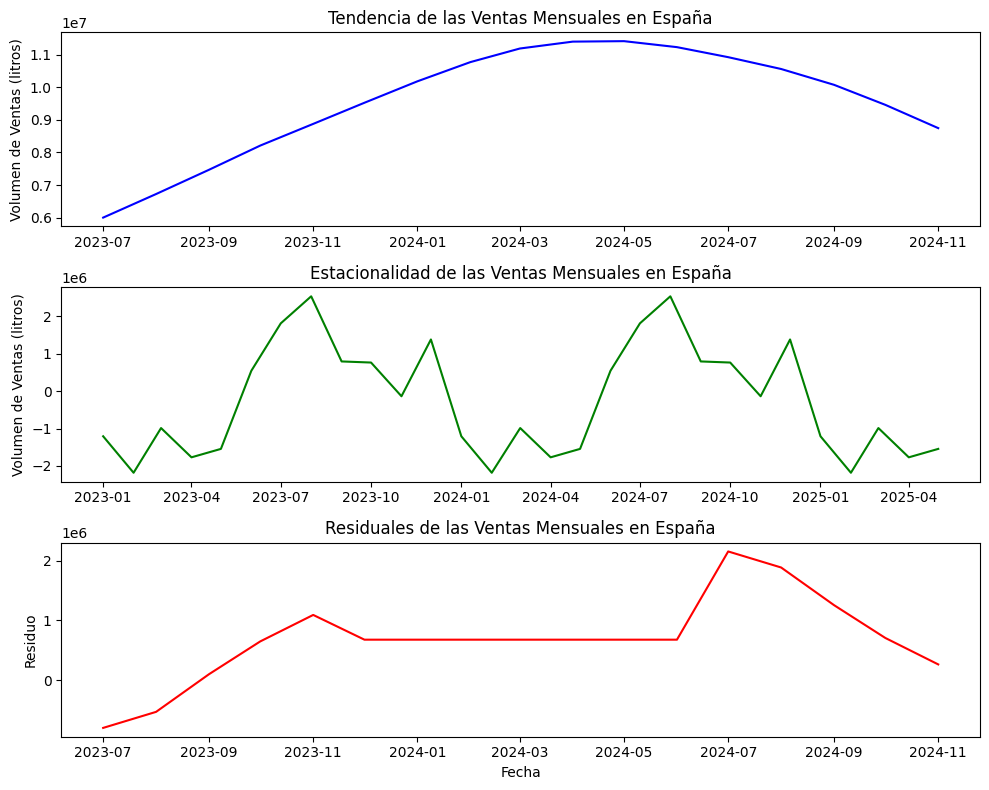

In [ ]:
# Graficamos los resultados de la descomposición
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=False)

# Tendencia
ax1.plot(descomposicion.trend, color='blue')
ax1.set_title('Tendencia de las Ventas Mensuales en España')
ax1.set_ylabel('Volumen de Ventas (litros)')

# Estacionalidad
ax2.plot(descomposicion.seasonal, color='green')
ax2.set_title('Estacionalidad de las Ventas Mensuales en España')
ax2.set_ylabel('Volumen de Ventas (litros)')

# Residuos
ax3.plot(descomposicion.resid, color='red')
ax3.set_title('Residuales de las Ventas Mensuales en España')
ax3.set_ylabel('Residuo')

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

#### **Análisis de la tendencia**

Por el gráfico podemos observar que las ventas en España crecen desde mediados de 2023 (segundo semestre de 2023) hacia 2024. Sin embargo, al no tener datos de actuals a partir de agosto de 2024, vemos cómo las ventas empiezan a disminuir.

Así que, aunque en los apartados anteriores hemos visto que es verdad que en los meses tendían a disminuir las ventas, hay un crecimiento constante a lo largo del tiempo.

#### **Análisis de la estacionalidad**

Para esta variable, vemos que hay picos bastante altos en el tercer trismestre (junio-julio-agosto). Tiene sentido por lo que hemos comentado en apartados anteriores también, que en esos meses las ventas aumentan. En diciembre parece haber también picos. Esto nos sugiere que sí que hay cierta estacionalidad en estos meses, coincidiendo con verno y con las fiestas de navidad.

Los valores negativos del primer trimestre (enero-febrero-marzo) nos indican una caída estacional, y tras investigar un poco parece que es algo normal en algunos mercados.

#### **Análisis de los residuos**

En los meses donde los residuos son más positivos, como noviembre de 2023 y junio de 2024, las ventas exceden las expectativas, lo que puede ser explicado por factores externos o eventos que impulsaron las ventas por encima de la media.

En cambio, los residuos negativos en meses como julio de 2023 sugieren que las ventas fueron menores a lo esperado, lo cual podría ser consecuencia de un comportamiento atípico.


### La marca con más ventas

Hemos visto en apartados anteriores que la marca con más ventas era Pepsi Max, entonces voy a seguir la misma metodología para analizar la tendencia y la estacionalidad que para las ventas en España.

In [ ]:
# Identificamos la marca con más ventas
ventas_marca_top = ventas.groupby('SUBBRAND')['AMOUNT'].sum()
marca_mas_ventas = ventas_marca_top.idxmax()  # Marca con más ventas

# Filtramos los datos para la marca con más ventas
ventas_marca = ventas[ventas['SUBBRAND'] == marca_mas_ventas]

# Aseguramos que la columna DATE está en formato datetime
ventas_marca['DATE'] = pd.to_datetime(ventas_marca[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupamos por fecha para obtener las ventas mensuales totales
ventas_mensuales_marca = ventas_marca.groupby('DATE')['AMOUNT'].sum()

# Descomponemos la serie temporal en tendencia, estacionalidad y residuales
descomposicion = seasonal_decompose(ventas_mensuales_marca, model='additive', period=12)

<ipython-input-52-af6cd9a94bf2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_marca['DATE'] = pd.to_datetime(ventas_marca[['YEAR', 'MONTH']].assign(DAY=1))


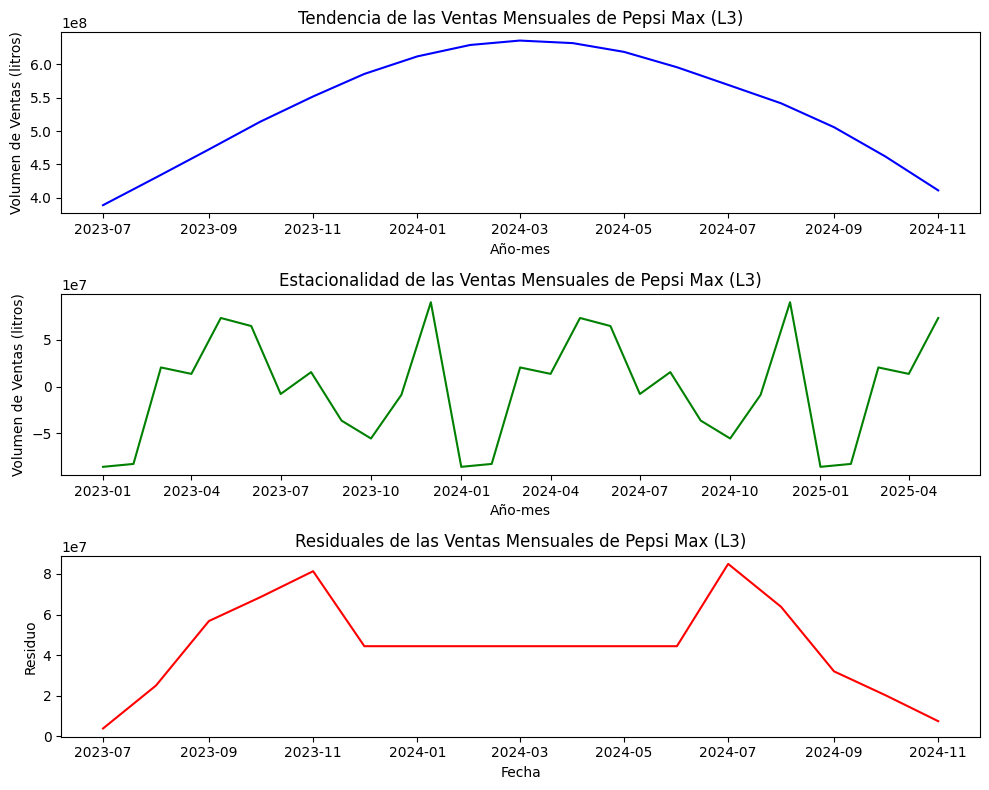

In [ ]:
# Graficamos los resultados de la descomposición
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=False)

# Tendencia
ax1.plot(descomposicion.trend, color='blue')
ax1.set_title(f'Tendencia de las Ventas Mensuales de {marca_mas_ventas}')
ax1.set_ylabel('Volumen de Ventas (litros)')
ax1.set_xlabel('Año-mes')

# Estacionalidad
ax2.plot(descomposicion.seasonal, color='green')
ax2.set_title(f'Estacionalidad de las Ventas Mensuales de {marca_mas_ventas}')
ax2.set_ylabel('Volumen de Ventas (litros)')
ax2.set_xlabel('Año-mes')

# Residuales
ax3.plot(descomposicion.resid, color='red')
ax3.set_title(f'Residuales de las Ventas Mensuales de {marca_mas_ventas}')
ax3.set_ylabel('Residuo')
ax3.set_xlabel('Año-mes')

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

#### **Análisis de la tendencia**

Por el gráfico podemos observar que las ventas Pepsi Max crecen desde mediados de 2023 (segundo semestre de 2023) hacia 2024. Sin embargo, vemos cómo las ventas empiezan a disminuira partir del segundo trimestre (abril).

#### **Análisis de la estacionalidad**

Para esta variable, vemos que hay picos bastante altos en mayo-junio. Tiene sentido por lo que hemos comentado en apartados anteriores también, que en esos meses las ventas aumentan. En diciembre parece haber también picos. Esto nos sugiere que sí que hay cierta estacionalidad en estos meses, coincidiendo con verano y con las fiestas de navidad.

Los valores negativos de los primeros meses (enero-febrero) nos indican una caída estacional, y tras investigar un poco parece que es algo normal en algunos mercados.

#### **Análisis de los residuos**

En los meses donde los residuos son más positivos, como noviembre de 2023 y junio de 2024, las ventas exceden las expectativas, lo que puede ser explicado por factores externos o eventos que impulsaron las ventas por encima de la media.


## **Predicciones hechas en España y su calidad**

El planteamiento que voy a seguir para este apartado es el siguiente:

* Filtro datos por Spain
* Separo en ventas reales (actuals) y predicciones (AI_forecast). He pensado en hacerlo por periodos así que nombraré los meses relativos a cada periodo para verlo más claro.

Para calcular la calidad de las predicciones comparando las ventas reales con las predicciones he visto que hay distintos métodos. La idea es comparar los valores que toma la columna AMOUNT cuando SCENARIO es actual o forecast (venta real o predicción). Aunque lo he hecho un poco más arriba con gráfico de barras y líneas, voy a utilizar métricas para ver qué me devuelve.


Las métricas para medir la precisión de las predicciones con las que ya estoy algo familiarizada son:

* Error Absoluto Medio (MAE): Promedio de las diferencias absolutas entre los valores reales y las predicciones.
* Error Cuadrático Medio (RMSE): Raíz cuadrada del promedio de los cuadrados de las diferencias entre los valores reales y las predicciones.
* Porcentaje de Error Absoluto Medio (MAPE): Promedio de los errores porcentuales absolutos.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filtramos los datos para España
ventas_espana = ventas[ventas['COUNTRY'] == 'Spain']

# Filtramos las ventas reales (SCENARIO == 'actual') y las predicciones (SCENARIO == 'AI_forecast')
ventas_reales = ventas_espana[ventas_espana['SCENARIO'] == 'actual']
predicciones = ventas_espana[ventas_espana['SCENARIO'] == 'AI_forecast']

# Aseguramos que las columnas YEAR y MONTH estén correctamente en formato datetime
ventas_reales['DATE'] = pd.to_datetime(ventas_reales[['YEAR', 'MONTH']].assign(DAY=1))
predicciones['DATE'] = pd.to_datetime(predicciones[['YEAR', 'MONTH']].assign(DAY=1))

# Asignamos las predicciones al mes correspondiente según la columna 'FORECAST'
# Por ejemplo, P02F corresponde a enero, P03F a febrero, etc.
forecast_month_map = {
    'AI_P02F': 'ENERO', 'AI_P03F': 'FEBRERO', 'AI_P04F': 'MARZO', 'AI_P05F': 'ABRIL', 'AI_P06F': 'MAYO', 'AI_P07F': 'JUNIO',
    'AI_P08F': 'JULIO', 'AI_P09F': 'AGOSTO', 'AI_P10F': 'SEPTIEMBRE', 'AI_P11F': 'OCTUBRE', 'AI_P12F': 'NOVIEMBRE', 'AI_PF': 'DICIEMBRE'
}
predicciones['forecast_month'] = predicciones['FORECAST'].map(forecast_month_map)

# Aseguramos que las predicciones y las ventas reales estén alineadas por fecha
# Para esto, realizamos un cruce de los datos de ventas reales con las predicciones según la fecha
merged_data = pd.merge(ventas_reales, predicciones, how='inner', on=['DATE'])

<ipython-input-54-47d59a158d6d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_reales['DATE'] = pd.to_datetime(ventas_reales[['YEAR', 'MONTH']].assign(DAY=1))
<ipython-input-54-47d59a158d6d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicciones['DATE'] = pd.to_datetime(predicciones[['YEAR', 'MONTH']].assign(DAY=1))
<ipython-input-54-47d59a158d6d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
# Error Absoluto Medio (MAE)
mae = mean_absolute_error(merged_data['AMOUNT_x'], merged_data['AMOUNT_y'])

# Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mean_squared_error(merged_data['AMOUNT_x'], merged_data['AMOUNT_y']))

# Porcentaje de Error Absoluto Medio (MAPE)
mape = np.mean(np.abs((merged_data['AMOUNT_x'] - merged_data['AMOUNT_y']) / merged_data['AMOUNT_x'])) * 100

print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Porcentaje de Error Absoluto Medio (MAPE): {mape:.2f}%")

Error Absoluto Medio (MAE): 48901.42
Raíz del Error Cuadrático Medio (RMSE): 63971.03
Porcentaje de Error Absoluto Medio (MAPE): 206.91%


#### **Interpretación MAE**

Es un valor bastante alto, lo que sugiere que las predicciones están bastante alejadas de las ventas reales en promedio. Sabiendo que las ventas en España no son muy altas, este error es muy significativo.

#### **Interpretación RMSE**

Este valor también es elevado, lo que nos indica que existen errores grandes que están influyendo en la precisión general del modelo.

#### **Interpretación MAPE**

El valor 206.91% indica que las predicciones, en promedio, tienen un error relativo de más del 200% en comparación con las ventas reales. Esto es un error *extremadamente alto*.

Esto sugiere, como bien habíamos supuesto en los apartados de las distribuciones, que las predicciones están extremadamente lejos de las ventas reales en términos relativos, lo que indica una pobre calidad del modelo de predicción. Las predicciones no son confiables y el modelo necesita mejorar.